This work is done in the context of Machine Learning Course at TBS.

In [3]:
import numpy as np 
import pandas as pd

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from scipy import stats
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from scipy.stats import ks_2samp, chi2_contingency
from IPython.display import display
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import keras_tuner as kt





First Look:

In [5]:
df = pd.read_csv(r'C:\Users\Dorra\Pictures\ML\mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


Nb of entries in our dataset:

In [6]:
df.shape

(54035, 9)

Columns and types:

In [7]:
df.dtypes


cap-diameter         int64
cap-shape            int64
gill-attachment      int64
gill-color           int64
stem-height        float64
stem-width           int64
stem-color           int64
season             float64
class                int64
dtype: object

The dataset provided is already cleaned, but we will check nonetheless:

In [33]:
df.isnull().sum()


cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

Descriptive Statistics:

In [34]:
df.describe().iloc[1:]


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


Correlation between Class and the rest of the columns:

In [8]:
df_corr = df.corr()['class'][:-1] # -1 to remove the last row which is class
df_corr.sort_values()

stem-width        -0.182856
cap-diameter      -0.165676
cap-shape         -0.133338
stem-color        -0.128339
season            -0.082919
gill-color        -0.063947
gill-attachment   -0.052541
stem-height        0.183354
Name: class, dtype: float64

Observations from Data Exploration:
- Dataset has 54035 rows and 9 columns.
- Data type of all columns is numerical (float or integer).
- All values are non-null. Therefore no missing values.
- Correlation between class and feature columns in df is low, absolute value ranging between 5% and 18.3%.

The dataset has already undergone z-score normalization, so we will skip that step.

Outliers:

In [13]:
# Calculate the z-scores for each column
z_scores = pd.DataFrame(stats.zscore(df), columns=df.columns)

# Generate descriptive statistics for the z-scores
z_scores.describe().round(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000,54035.000
mean,0.000,0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.576,-1.852,-0.961,-2.290,-1.165,-1.344,-2.581,-3.026,-1.104
25%,-0.773,-0.926,-0.961,-0.728,-0.750,-0.806,-0.741,-0.208,-1.104
50%,-0.117,0.463,-0.512,0.210,-0.255,-0.164,0.792,-0.029,0.906
75%,0.594,0.926,0.834,0.834,0.454,0.603,0.792,-0.029,0.906
max,3.678,0.926,1.731,1.147,4.726,3.220,1.098,2.788,0.906


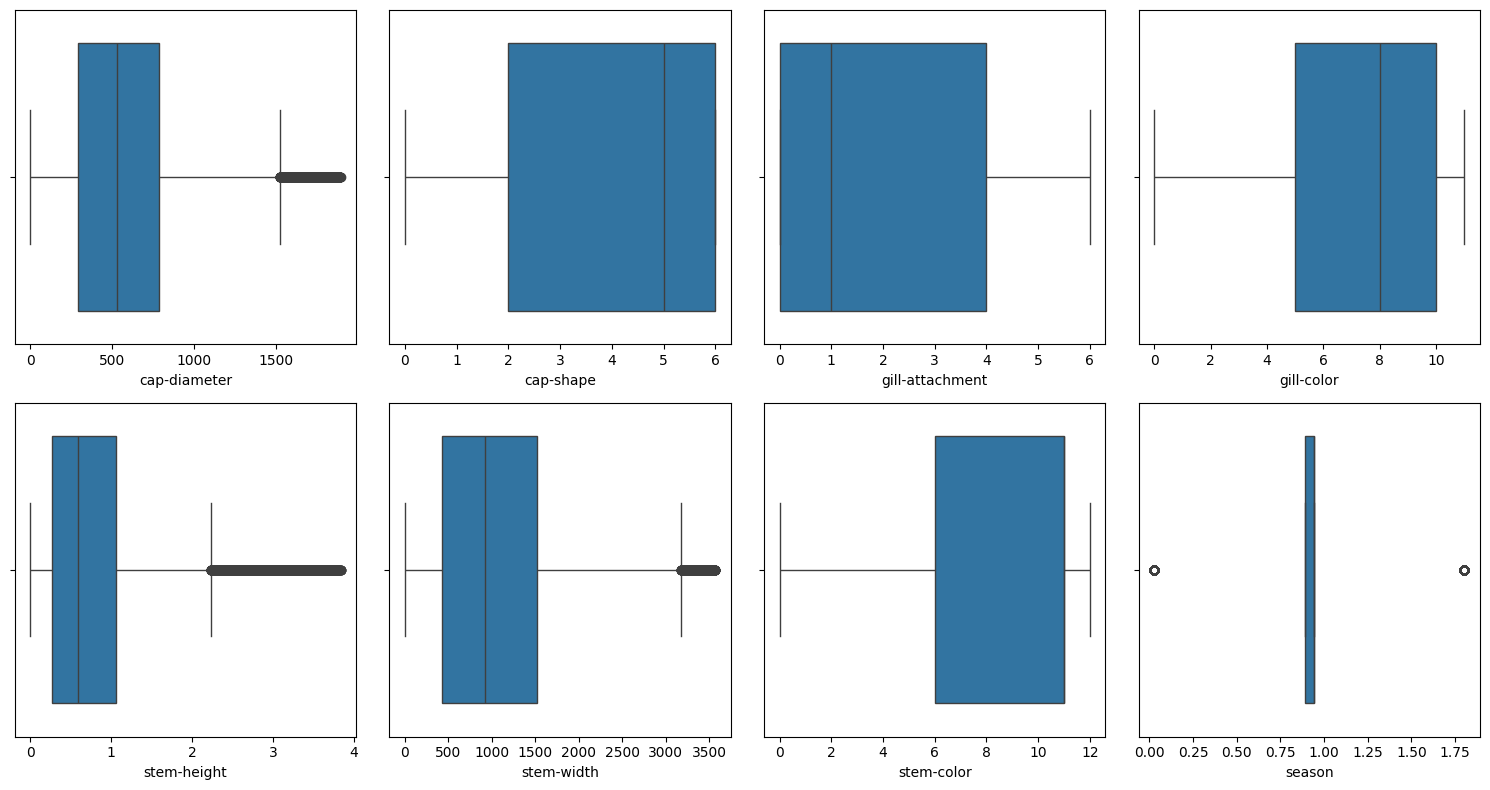

In [9]:
columns = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color','stem-height', 'stem-width', 'stem-color', 'season']

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axs = axs.flatten()
for i, column in enumerate(columns):
    sns.boxplot(data=df, x=column, ax=axs[i])  

plt.tight_layout()  
plt.show() 

In [14]:
# Identify rows where any of the z-scores exceed the threshold
outliers = z_scores[(np.abs(z_scores) > 3).any(axis=1)]

# Drop the identified rows containing outliers
df_no_outliers = df.drop(outliers.index)

Let's drop rows containing outliers (with Z-score > 3).

In [15]:
# Calculate number of rows of original dataframe, of new one and how many rows were removed
new_num_r = df_no_outliers.shape[0]
old_num_r = df.shape[0]
removed = old_num_r - new_num_r

print("New dataframe has {} rows. {} rows were removed.".format(new_num_r, removed))

New dataframe has 50397 rows. 3638 rows were removed.


Overall Class Imbalance:

Overall Class Distribution:
       proportion
class            
1       54.918109
0       45.081891


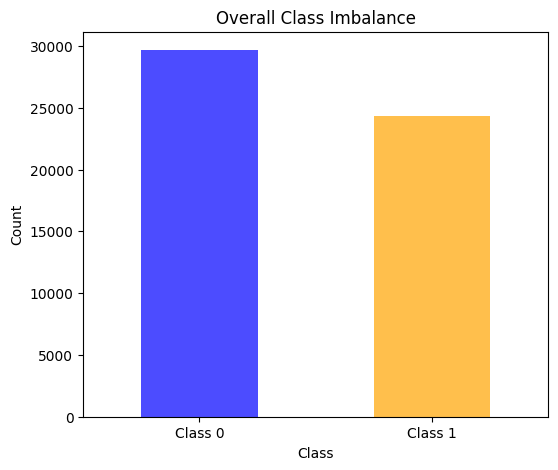

In [16]:
# Calculate overall class distribution
class_counts = df['class'].value_counts(normalize=True) * 100

# Display the class distribution
print("Overall Class Distribution:")
print(class_counts.to_frame())

# Visualizing Overall Class Imbalance with Blue and Orange Colors
plt.figure(figsize=(6, 5))
df['class'].value_counts().plot(kind='bar', color=['blue', 'orange'], alpha=0.7)
plt.title("Overall Class Imbalance")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Class 0', 'Class 1'], rotation=0)
plt.show()


Classes are overall reasonably balanced.

Features Class Imbalance:

In [17]:


# Define feature columns (excluding the target column 'class')
feature_columns = df.columns[df.columns != 'class']

# Re-run statistical tests for feature-class imbalance

# Dictionary to store test results
feature_class_imbalance_results = {}

# Iterate through each feature and perform statistical tests
for feature in feature_columns:
    # If the feature is numerical, use KS-Test
    if df[feature].dtype in ['int64', 'float64']:
        stat, p_value = ks_2samp(df[df['class'] == 1][feature], df[df['class'] == 0][feature])
        feature_class_imbalance_results[feature] = {'Test': 'KS-Test', 'Statistic': stat, 'P-Value': p_value}
    
    # If the feature is categorical, use Chi-Square Test
    else:
        contingency_table = pd.crosstab(df[feature], df['class'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        feature_class_imbalance_results[feature] = {'Test': 'Chi-Square', 'Statistic': chi2, 'P-Value': p_value}

# Convert results to DataFrame for easier interpretation
feature_class_imbalance_df = pd.DataFrame.from_dict(feature_class_imbalance_results, orient='index')

# Display the statistical results
display(feature_class_imbalance_df)



# Function to calculate Cohen's d (effect size)
def cohen_d(x1, x2):
    """Calculate Cohen's d for two independent samples."""
    mean_diff = np.mean(x1) - np.mean(x2)
    pooled_std = np.sqrt((np.std(x1, ddof=1) ** 2 + np.std(x2, ddof=1) ** 2) / 2)
    return mean_diff / pooled_std

# Dictionary to store effect size results
effect_size_results = {}

# Calculate Cohen's d for each numerical feature
for feature in feature_class_imbalance_df.index:
    class_1_values = df[df['class'] == 1][feature]
    class_0_values = df[df['class'] == 0][feature]
    
    # Compute Cohen's d
    effect_size = cohen_d(class_1_values, class_0_values)
    effect_size_results[feature] = {'Cohen\'s d': effect_size}

# Convert results to DataFrame
effect_size_df = pd.DataFrame.from_dict(effect_size_results, orient='index')

# Display effect size results
display(effect_size_df)



,Test,Statistic,P-Value
cap-diameter,KS-Test,0.174199,0.000000e+00
cap-shape,KS-Test,0.125214,2.769306e-183
gill-attachment,KS-Test,0.098374,3.799099e-113
gill-color,KS-Test,0.106554,1.015611e-132
stem-height,KS-Test,0.184579,0.000000e+00
stem-width,KS-Test,0.240441,0.000000e+00
stem-color,KS-Test,0.165519,8.754843e-321
season,KS-Test,0.074226,1.521302e-64


,Cohen's d
cap-diameter,-0.337909
cap-shape,-0.271657
gill-attachment,-0.105941
gill-color,-0.128616
stem-height,0.377580
stem-width,-0.375564
stem-color,-0.261044
season,-0.164263


All features have a Cohen’s d below 0.35 (maximum one being 0.34 with cap-diameter), meaning the differences aren’t very strong. Minimal imbalance, likely not a concern.

Even though statistical tests flagged all features as imbalanced, the effect size suggests the imbalance is weak, meaning negligible impact on the models.

Skewness:

In [18]:

# Calculate skewness for each numerical feature
skewness_results = df[feature_class_imbalance_df.index].skew()

# Convert to DataFrame for better visualization
skewness_df = skewness_results.to_frame(name="Skewness")

# Display skewness results
display(skewness_df)


,Skewness
cap-diameter,0.782562
cap-shape,-0.534834
gill-attachment,0.589288
gill-color,-0.488642
stem-height,1.461606
stem-width,0.812370
stem-color,-0.632628
season,0.551232


Understanding Skewness:
Skewness ≈ 0 → Symmetrical distribution (ideal for many models).
Skewness > 0.5 → Right (Positive) Skew (long tail on the right).
Skewness < -0.5 → Left (Negative) Skew (long tail on the left).
Severely skewed features (>1 or <-1) may need log transformation, square root transformation, or normalization.

"Stem-height" (1.46) and "Cap-diameter" (0.78) are moderately to highly right-skewed. 
"Cap-shape" (-0.53) and "Gill-color" (-0.48) are slightly left-skewed, but not extreme. 
"Gill-attachment" (0.59) is mildly right-skewed.

Data Visualizations:

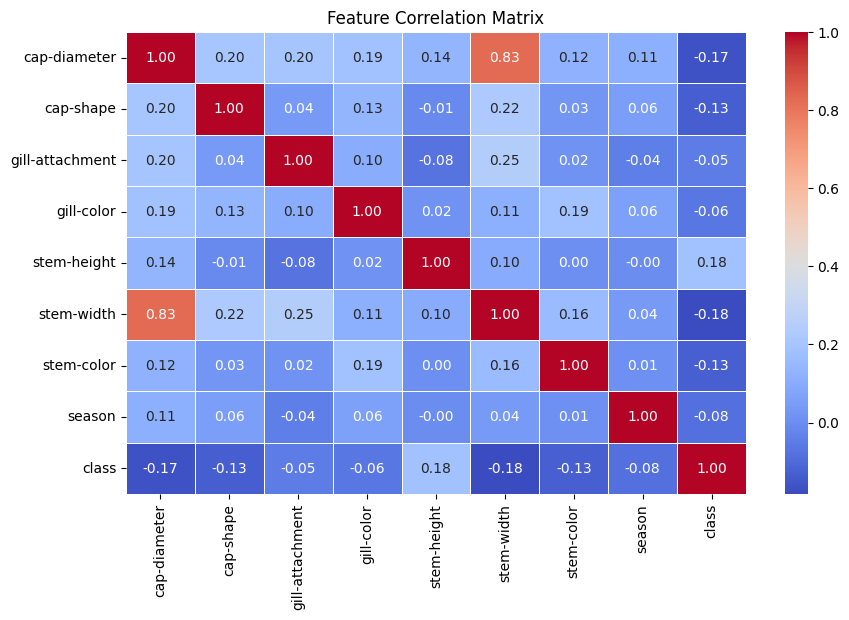

In [19]:

# Compute the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Close to 1 → Strong positive correlation (both features increase together).
Close to -1 → Strong negative correlation (one increases while the other decreases).
Near 0 → Weak or no correlation.

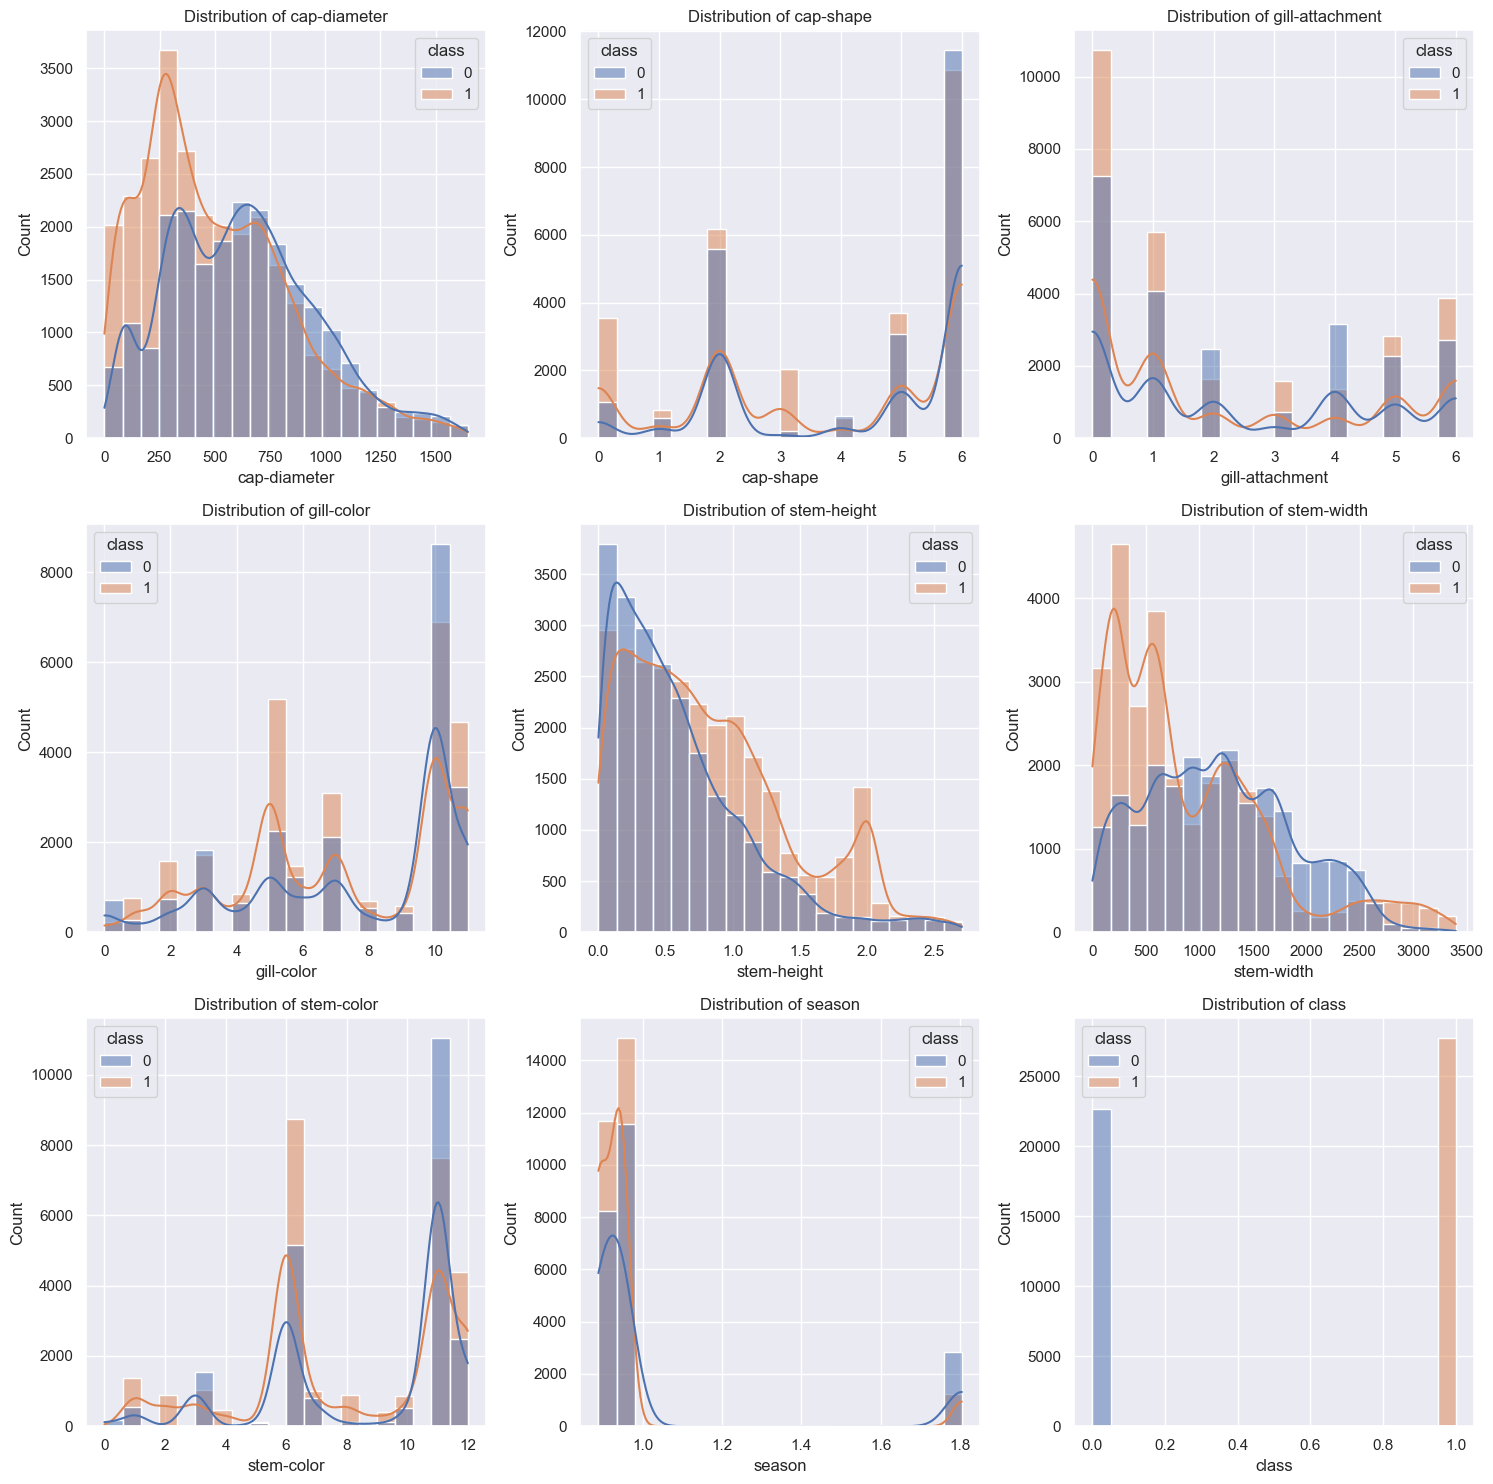

In [20]:
# Set Seaborn style
sns.set_theme()

# Create subplots with 3 columns and 3 rows
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column in the DataFrame
for i, column in enumerate(df_no_outliers.columns):
    # Create a histogram plot for the current column with hue
    sns.histplot(data=df_no_outliers, x=column, hue='class', kde=True, bins=20, ax=axes[i])
    
    # Set title for the plot
    axes[i].set_title(f'Distribution of {column}')
    
# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Display the plot
plt.show()


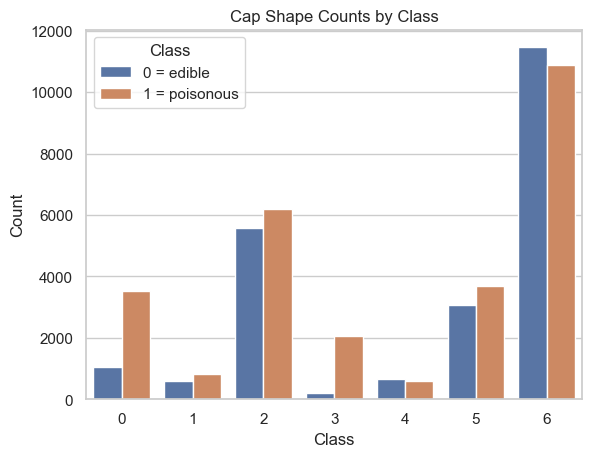

In [21]:
sns.set_theme(style="whitegrid")

# Create a count plot to visualize the distribution of 'cap-shape' with hue by 'class'
sns.countplot(hue='class', x='cap-shape', data=df_no_outliers)

# Adding title and labels
plt.title('Cap Shape Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

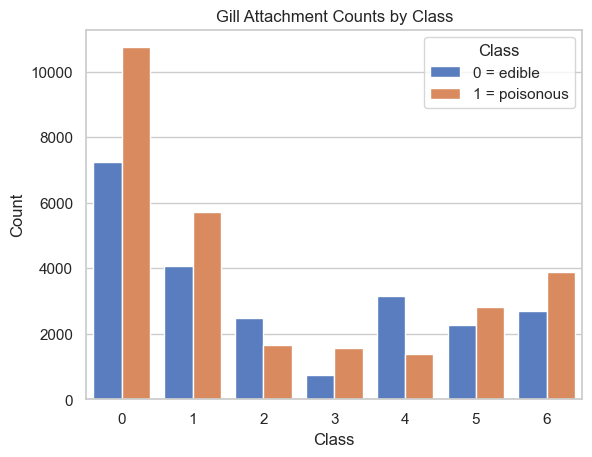

In [22]:
sns.set_theme(style="whitegrid", palette="muted", color_codes=True)

# Create a count plot to visualize the distribution of 'gill-attachment' with hue by 'class'
sns.countplot(hue='class', x='gill-attachment', data=df_no_outliers)

# Adding title and labels
plt.title('Gill Attachment Counts by Class')
plt.legend(title='Class', labels=['0 = edible', '1 = poisonous'])
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

Differences between classes are evident in the histograms and count plots. On average poisonous mushrooms have smaller cap diameters and taller, slimmer stems compared to edible ones.

Data Preprocessing:

Set a variable X equal to the numerical features and a variable y equal to the "class" column.

In [23]:
X = df_no_outliers.loc[:, df_no_outliers.columns != "class"]
y = df_no_outliers['class']

Data Scaling:

In [24]:

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

Train / Test Split: We must ensure all models use the same test and train sets so that we guarantee a fair comparison later on.

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=101, stratify=y)

Defining a cross validation k fold:

In [50]:

# # Define K-Fold Cross-Validation function
# def perform_kfold_cv(model, X, y, k=5):
#     """Performs K-Fold cross-validation and returns mean accuracy."""
#     kf = KFold(n_splits=k, shuffle=True, random_state=42)
#     scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
#     return scores.mean(), scores.std()

# # Set the number of folds
# k_folds = 5

# # Confirming K-Fold setup
# kf
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)


Traditional Models:

Logistic Regression:

In [51]:


logistic_model = LogisticRegression(max_iter=1000, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Logistic Regression  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)

Logistic Regression  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       



In [ ]:




# # Define the parameter grid for C (regularization strength)
# param_grid = {
#     "C": [0.001, 0.01, 0.1, 1, 10, 100],
#     "penalty": ["l1", "l2"],
#     "solver": ["liblinear", "saga"],
#     "max_iter": [500, 1000, 2000]
# }

# # Perform GridSearchCV with K-Fold CV
# grid_search = GridSearchCV(
#     logistic_model,
#     param_grid,
#     cv=kf,
#     scoring="accuracy",
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Get the best parameters and the best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492


In [53]:
# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    logistic_model.fit(X_train, y_train)
    y_pred = logistic_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Logistic Regression - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


Logistic Regression - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.62        0.55        0.59        4529        
1           0.67        0.73        0.70        5550        

Accuracy    0.64        
Macro Avg   0.64        0.64        0.64        10079       
Weighted Avg0.65        0.65        0.65        10079       

Final Confusion Matrix:
[[12475 10170]
 [ 7514 20238]]


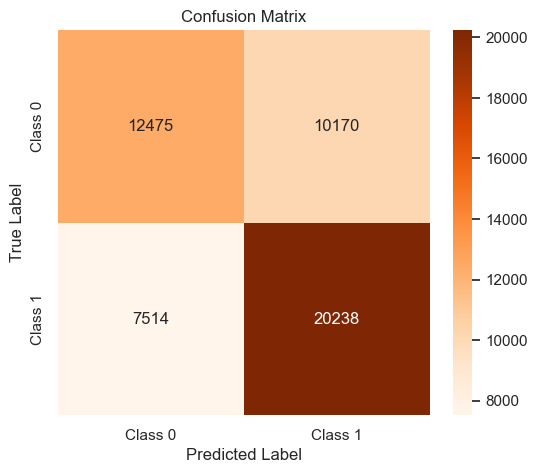

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define labels
labels = ["Class 0", "Class 1"]

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


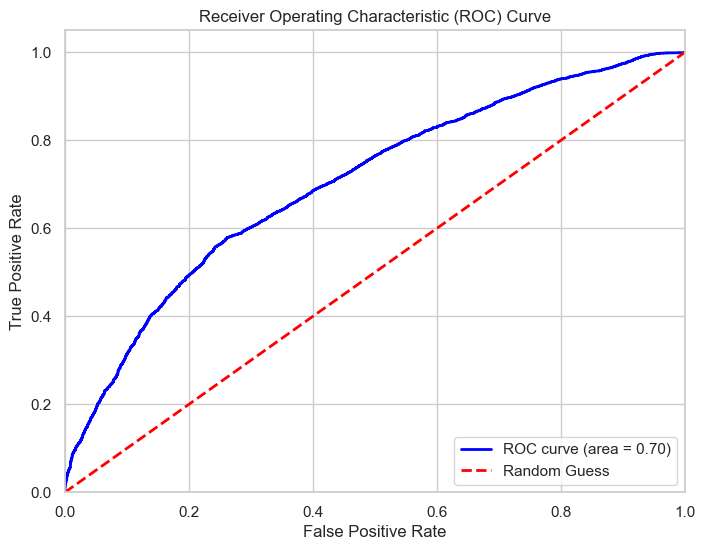

In [55]:
from sklearn.metrics import roc_curve, auc

predictions_proba = logistic_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

KNN:

In [56]:

knn_model = KNeighborsClassifier(n_neighbors=3)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"K-Nearest Neighbors  (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


K-Nearest Neighbors  (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.69        0.70        0.69        4529        
1           0.75        0.74        0.74        5550        

Accuracy    0.72        
Macro Avg   0.72        0.72        0.72        10079       
Weighted Avg0.72        0.72        0.72        10079       



In [60]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    "n_neighbors": range(1, 21, 2),  # More values for finer tuning
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
    "p": [1, 2, 3],  # Optimize distance metric
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Perform RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(
    knn_model,
    param_grid,
    n_iter=20,  # Randomly sample 20 combinations
    cv=kf,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.6492


In [61]:

# Ensure best_params is from the KNeighborsClassifier grid search
best_knn_params = grid_search.best_params_

# Update KNN model with the best parameters
knn_model = KNeighborsClassifier(
    n_neighbors=best_knn_params['n_neighbors'],
    weights=best_knn_params['weights'],
    metric=best_knn_params['metric'],
    p=best_knn_params['p'],
    algorithm=best_knn_params['algorithm']
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"K-Nearest Neighbors - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


KeyError: 'n_neighbors'

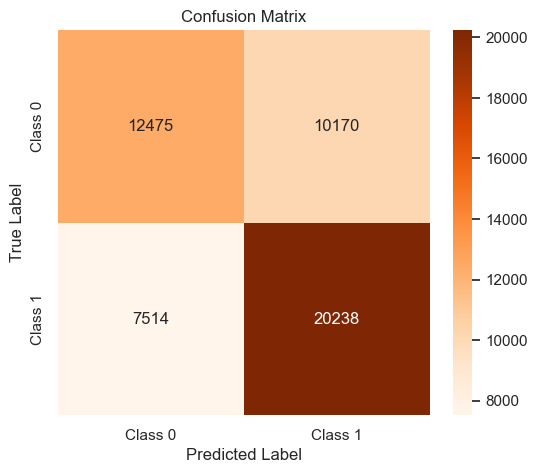

In [62]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


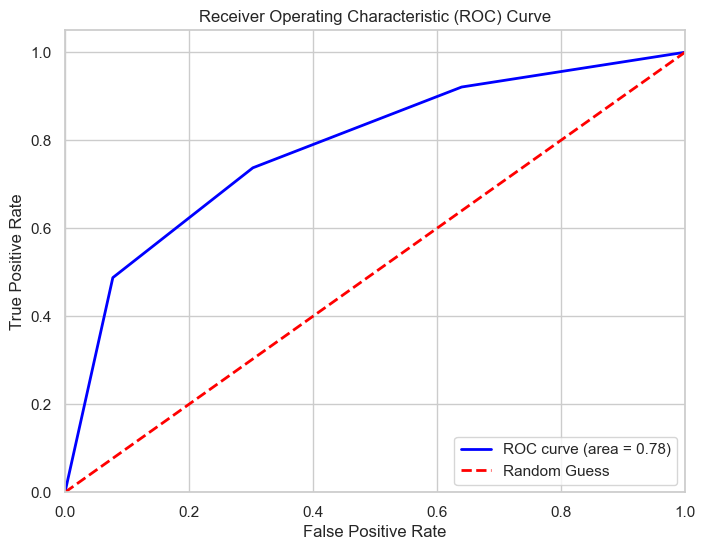

In [63]:
from sklearn.metrics import roc_curve, auc

predictions_proba = knn_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Random Forest:

In [64]:

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

precision_list, recall_list, f1_list, support_list = [], [], [], []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)

avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)
print(report)


Random Forest - Final Evaluation (K=5)

Class       Precision   Recall      F1-Score    Support     
0           0.99        0.99        0.99        4529        
1           0.99        0.99        0.99        5550        

Accuracy    0.99        
Macro Avg   0.99        0.99        0.99        10079       
Weighted Avg0.99        0.99        0.99        10079       



In [65]:
# Define the expanded parameter grid for hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200, 300, 500],  # Number of trees in the forest
    "max_depth": [None, 10, 20, 30, 40],  # Depth of trees
    "min_samples_split": [2, 5, 10],  # Minimum samples to split
    "min_samples_leaf": [1, 2, 4],  # Minimum samples per leaf
    "bootstrap": [True, False],  # Bootstrap sampling
    "max_features": ["auto", "sqrt", "log2"],  # Number of features to consider
    "criterion": ["gini", "entropy"],  # Splitting criterion
    "class_weight": [None, "balanced"]  # Handle class imbalance
}

# Perform RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    n_iter=20,  # Randomly sample 20 combinations
    cv=kf,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1,
    random_state=42
)


# Fit the randomized search to the data
random_search.fit(X, y)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 436, in _validate_params
    validate

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': None, 'bootstrap': True}
Best Cross-Validation Accuracy: 0.9898


In [ ]:
# Update Random Forest model with the best parameters
random_forest_model = RandomForestClassifier(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap'],
    max_features=best_params['max_features'],
    criterion=best_params['criterion'],
    class_weight=best_params['class_weight'],
    random_state=42
)

# Evaluate the updated model using K-Fold CV
precision_list, recall_list, f1_list, support_list = [], [], [], []
confusion_matrices = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    random_forest_model.fit(X_train, y_train)
    y_pred = random_forest_model.predict(X_test)

    precision, recall, f1, support = precision_recall_fscore_support(
        y_test, y_pred, labels=[0, 1], zero_division=0
    )
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    support_list.append(support)
    
    # Compute and store confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

# Compute average precision, recall, f1-score
avg_precision = np.mean(precision_list, axis=0)
avg_recall = np.mean(recall_list, axis=0)
avg_f1 = np.mean(f1_list, axis=0)
avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# Compute final confusion matrix (sum of all folds)
final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# Generate report
report = (
    f"Random Forest - Final Evaluation (K={kf.get_n_splits()})\n\n"
    f"{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}\n"
)
for i, label in enumerate(["0", "1"]):
    report += (
        f"{label:<12}{avg_precision[i]:<12.2f}{avg_recall[i]:<12.2f}{avg_f1[i]:<12.2f}{avg_support[i]:<12.0f}\n"
    )
report += (
    f"\n{'Accuracy':<12}{np.mean(avg_f1):<12.2f}\n"
    f"{'Macro Avg':<12}{np.mean(avg_precision):<12.2f}{np.mean(avg_recall):<12.2f}{np.mean(avg_f1):<12.2f}{sum(avg_support):<12.0f}\n"
    f"{'Weighted Avg':<12}{np.average(avg_precision, weights=avg_support):<12.2f}{np.average(avg_recall, weights=avg_support):<12.2f}{np.average(avg_f1, weights=avg_support):<12.2f}{sum(avg_support):<12.0f}\n"
)

print(report)
print("Final Confusion Matrix:")
print(final_confusion_matrix)


In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

predictions_proba = random_forest_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, predictions_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

##########################################################################
##########################################################################
##########################################################################
##########################################################################
##########################################################################
##########################################################################

Deep Learning Models:

Fully Connected Neural Network (Feedforward Neural Network):

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

# Build MLP Model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Epoch 1/20


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6624 - loss: 0.6038 - val_accuracy: 0.7806 - val_loss: 0.4769
Epoch 2/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7834 - loss: 0.4693 - val_accuracy: 0.8525 - val_loss: 0.3708
Epoch 3/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8364 - loss: 0.3818 - val_accuracy: 0.8750 - val_loss: 0.3067
Epoch 4/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8631 - loss: 0.3295 - val_accuracy: 0.8964 - val_loss: 0.2640
Epoch 5/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8840 - loss: 0.2876 - val_accuracy: 0.9187 - val_loss: 0.2260
Epoch 6/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8981 - loss: 0.2539 - val_accuracy: 0.9362 - val_loss: 0.1937
Epoch 7/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9105 - loss: 0.2325 - val_accuracy: 0.9399 - val_loss: 0.1824
Epoch 8/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9208 - loss: 0.2048 - val_accurac

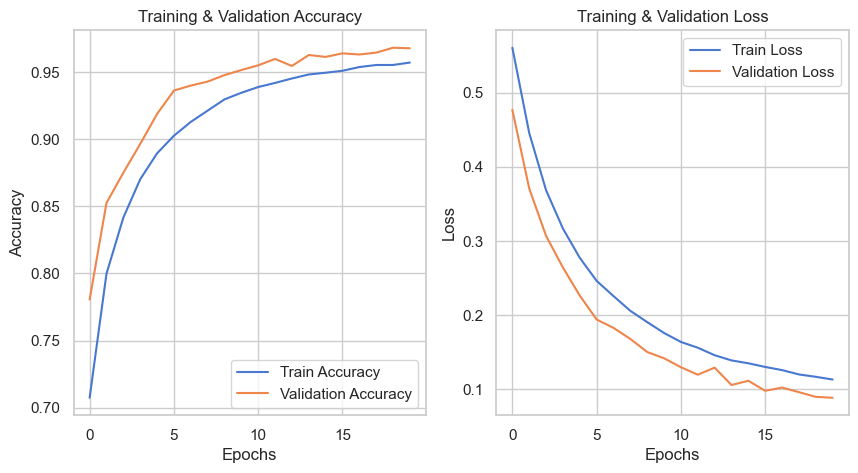

In [27]:
# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()


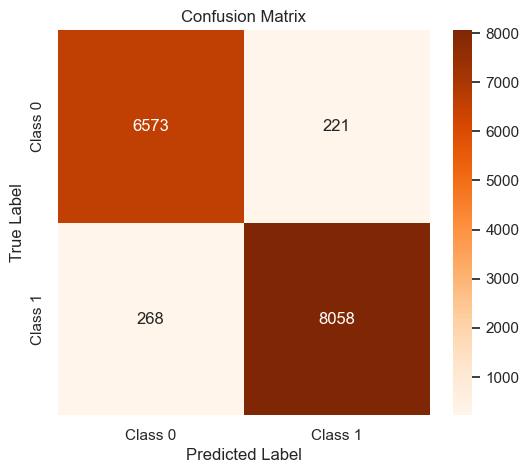

In [28]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Hyperparameter Tuning:

Reloading Tuner from tuning_dir\mlp_tuning\tuner0.json
Best Hyperparameters: {'units1': 128, 'units2': 256, 'dropout': 0.2, 'lr': 0.0001}
Epoch 1/20


C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\1108113459.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1103/1103 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6470 - loss: 0.6247 - val_accuracy: 0.7079 - val_loss: 0.5529
Epoch 2/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7179 - loss: 0.5439 - val_accuracy: 0.7505 - val_loss: 0.5034
Epoch 3/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7614 - loss: 0.4980 - val_accuracy: 0.8078 - val_loss: 0.4599
Epoch 4/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8035 - loss: 0.4556 - val_accuracy: 0.8308 - val_loss: 0.4236
Epoch 5/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8230 - loss: 0.4240 - val_accuracy: 0.8435 - val_loss: 0.3874
Epoch 6/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8388 - loss: 0.3897 - val_accuracy: 0.8563 - val_loss: 0.3595
Epoch 7/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8520 - loss: 0.3618 - val_accuracy: 0.8653 - val_loss: 0.3358
Epoch 8/20
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8641 - loss: 0.3362 - val_accurac

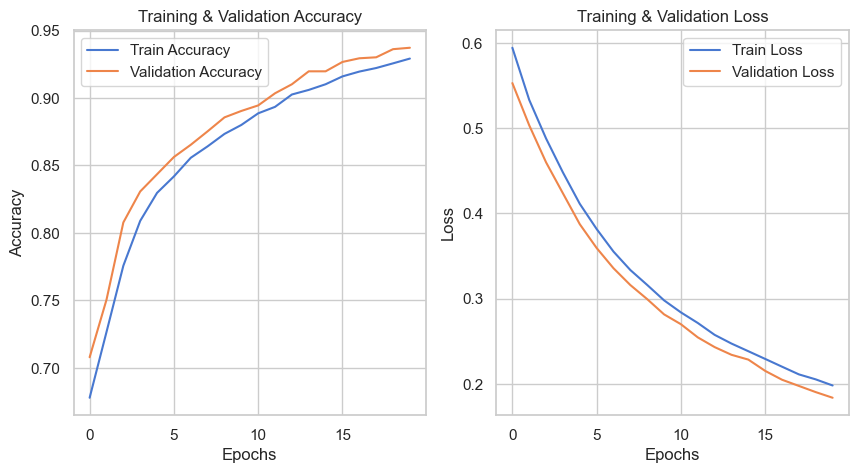

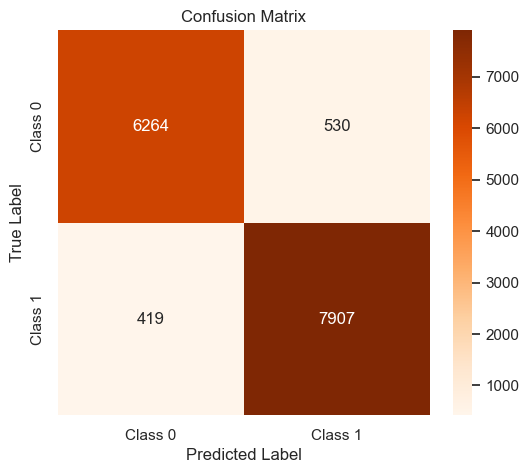

In [29]:
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

##################### VERSION 2
# Function to build model for hyperparameter tuning
def build_model(hp):
    model = Sequential([
        Dense(hp.Int('units1', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)),
        Dense(hp.Int('units2', min_value=32, max_value=256, step=32), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='tuning_dir',
    project_name='mlp_tuning'
)

tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Build and train model with best hyperparameters
model = build_model(best_hps)
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Early Stopping:

Epoch 1/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9306 - loss: 0.1951 - val_accuracy: 0.9368 - val_loss: 0.1806
Epoch 2/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9305 - loss: 0.1923 - val_accuracy: 0.9414 - val_loss: 0.1715
Epoch 3/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9342 - loss: 0.1819 - val_accuracy: 0.9437 - val_loss: 0.1666
Epoch 4/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9362 - loss: 0.1782 - val_accuracy: 0.9462 - val_loss: 0.1608
Epoch 5/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9415 - loss: 0.1678 - val_accuracy: 0.9480 - val_loss: 0.1562
Epoch 6/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9397 - loss: 0.1672 - val_accuracy: 0.9490 - val_loss: 0.1534
Epoch 7/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9437 - loss: 0.1587 - val_accuracy: 0.9508 - val_loss: 0.1493
Epoch 8/50
1103/1103 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9456 - loss: 0.1563 - 

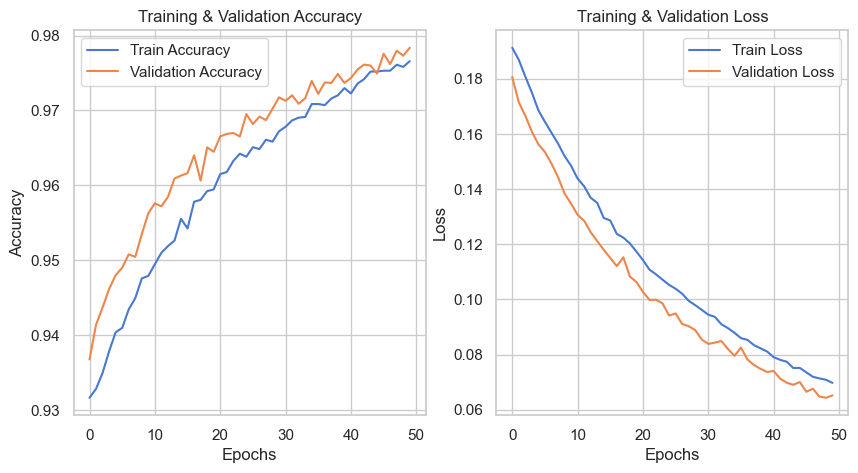

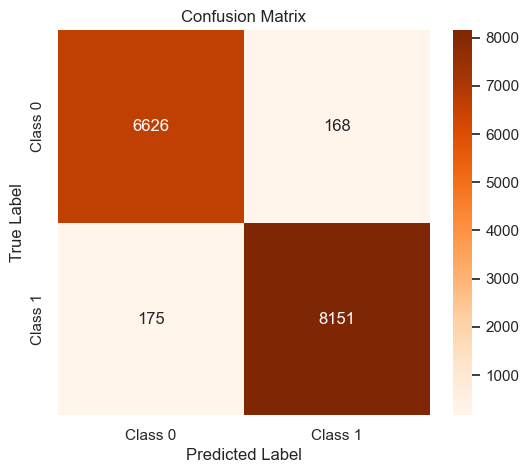

In [30]:
# Implement Early Stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Train Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate Model
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot Training History
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

TabNet:

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.54692 | val_0_accuracy: 0.77837 |  0:00:04s
epoch 1  | loss: 0.44262 | val_0_accuracy: 0.8039  |  0:00:11s
epoch 2  | loss: 0.41568 | val_0_accuracy: 0.80873 |  0:00:15s
epoch 3  | loss: 0.39297 | val_0_accuracy: 0.85827 |  0:00:18s
epoch 4  | loss: 0.34097 | val_0_accuracy: 0.87698 |  0:00:21s
epoch 5  | loss: 0.30769 | val_0_accuracy: 0.90106 |  0:00:24s
epoch 6  | loss: 0.28587 | val_0_accuracy: 0.90615 |  0:00:27s
epoch 7  | loss: 0.24824 | val_0_accuracy: 0.90079 |  0:00:30s
epoch 8  | loss: 0.24906 | val_0_accuracy: 0.92288 |  0:00:33s
epoch 9  | loss: 0.2276  | val_0_accuracy: 0.90403 |  0:00:36s
epoch 10 | loss: 0.24436 | val_0_accuracy: 0.92599 |  0:00:39s
epoch 11 | loss: 0.20363 | val_0_accuracy: 0.93208 |  0:00:42s
epoch 12 | loss: 0.19979 | val_0_accuracy: 0.9459  |  0:00:47s
epoch 13 | loss: 0.18084 | val_0_accuracy: 0.93399 |  0:00:51s
epoch 14 | loss: 0.17238 | val_0_accuracy: 0.9463  |  0:00:55s
epoch 15 | loss: 0.17064 | val_0_accuracy: 0.95582 |  0

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Accuracy: 0.9767
Precision: 0.9702
Recall: 0.9881
F1-Score: 0.9791


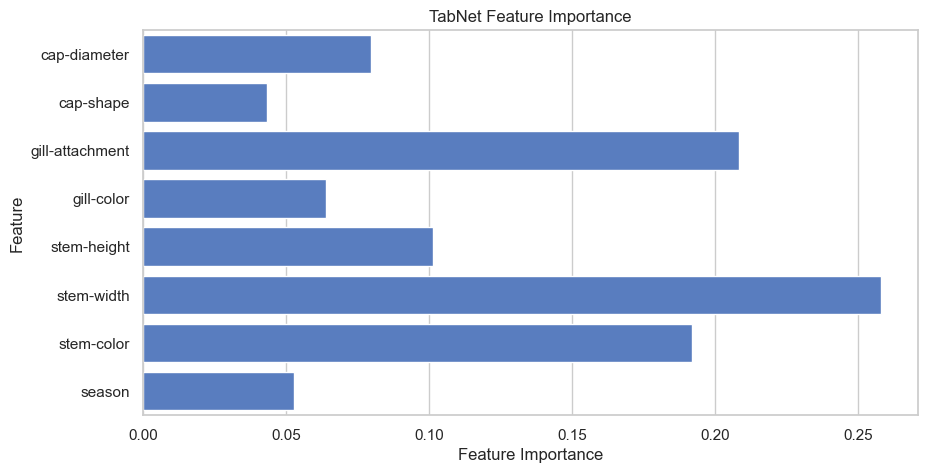

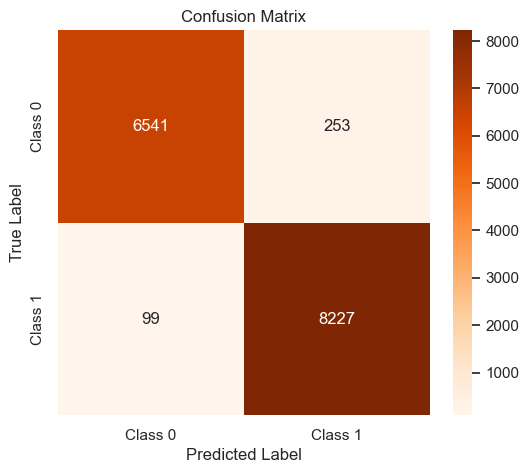

In [31]:

from pytorch_tabnet.tab_model import TabNetClassifier

# Convert to float32 (required for TabNet)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

# Initialize and Train TabNet Model
tabnet_model = TabNetClassifier()
tabnet_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256,
    virtual_batch_size=128,
    num_workers=0
)

# Predictions
y_pred_probs = tabnet_model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_probs > 0.5).astype(int)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Feature Importance
feature_importances = tabnet_model.feature_importances_
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=X.columns)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("TabNet Feature Importance")
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [39]:
import optuna
import numpy as np
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score

# Define the objective function for Optuna
def objective(trial):
    # Define the hyperparameter search space
    params = {
        "n_d": trial.suggest_categorical("n_d", [8, 16, 24, 32, 64]),
        "n_a": trial.suggest_categorical("n_a", [8, 16, 24, 32, 64]),
        "n_steps": trial.suggest_int("n_steps", 3, 10),
        "gamma": trial.suggest_float("gamma", 1.0, 1.5, step=0.1),
        "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
        "momentum": trial.suggest_float("momentum", 0.02, 0.1, step=0.01),
        "batch_size": trial.suggest_categorical("batch_size", [128, 256, 512]),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    }

    # Initialize and train TabNet model
    model = TabNetClassifier(
        n_d=params["n_d"],
        n_a=params["n_a"],
        n_steps=params["n_steps"],
        gamma=params["gamma"],
        lambda_sparse=params["lambda_sparse"],
        momentum=params["momentum"],
        optimizer_fn=torch.optim.Adam,
        optimizer_params=dict(lr=params["learning_rate"]),
        device_name="cuda" if torch.cuda.is_available() else "cpu"
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_test, y_test)],
        max_epochs=10, patience=10,
        batch_size=params["batch_size"], virtual_batch_size=32
    )

    # Evaluate accuracy
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Run Optuna optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Get best parameters
best_params = study.best_params
print(f"Best hyperparameters: {best_params}")

[I 2025-01-24 17:51:47,434] A new study created in memory with name: no-name-f9be2061-49ef-4778-b02e-4f8c8eee72be
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.8096  | val_0_auc: 0.75965 |  0:00:18s
epoch 1  | loss: 0.60277 | val_0_auc: 0.7664  |  0:00:39s
epoch 2  | loss: 0.59832 | val_0_auc: 0.74293 |  0:01:01s
epoch 3  | loss: 0.58652 | val_0_auc: 0.78845 |  0:01:21s
epoch 4  | loss: 0.57287 | val_0_auc: 0.8117  |  0:01:41s
epoch 5  | loss: 0.56767 | val_0_auc: 0.7951  |  0:02:02s
epoch 6  | loss: 0.56762 | val_0_auc: 0.81933 |  0:02:22s
epoch 7  | loss: 0.56058 | val_0_auc: 0.80687 |  0:02:42s
epoch 8  | loss: 0.5599  | val_0_auc: 0.82393 |  0:03:00s
epoch 9  | loss: 0.56407 | val_0_auc: 0.80448 |  0:03:20s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_val_0_auc = 0.82393


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 17:55:18,201] Trial 0 finished with value: 0.7426587301587302 and parameters: {'n_d': 32, 'n_a': 64, 'n_steps': 9, 'gamma': 1.5, 'lambda_sparse': 0.0010244488166255216, 'momentum': 0.03, 'batch_size': 128, 'learning_rate': 0.06307566496014681}. Best is trial 0 with value: 0.7426587301587302.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.68517 | val_0_auc: 0.7149  |  0:00:15s
epoch 1  | loss: 0.62023 | val_0_auc: 0.74092 |  0:00:29s
epoch 2  | loss: 0.62542 | val_0_auc: 0.71293 |  0:00:43s
epoch 3  | loss: 0.61632 | val_0_auc: 0.74271 |  0:00:58s
epoch 4  | loss: 0.60104 | val_0_auc: 0.76678 |  0:01:14s
epoch 5  | loss: 0.6038  | val_0_auc: 0.78406 |  0:01:30s
epoch 6  | loss: 0.5851  | val_0_auc: 0.8081  |  0:01:44s
epoch 7  | loss: 0.58046 | val_0_auc: 0.75717 |  0:01:58s
epoch 8  | loss: 0.58449 | val_0_auc: 0.77954 |  0:02:14s
epoch 9  | loss: 0.58185 | val_0_auc: 0.77774 |  0:02:30s
Stop training because you reached max_epochs = 10 with best_epoch = 6 and best_val_0_auc = 0.8081


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 17:57:56,357] Trial 1 finished with value: 0.7312830687830688 and parameters: {'n_d': 32, 'n_a': 32, 'n_steps': 7, 'gamma': 1.4, 'lambda_sparse': 0.0007667368178060924, 'momentum': 0.04, 'batch_size': 128, 'learning_rate': 0.07158842912012313}. Best is trial 0 with value: 0.7426587301587302.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 1.93043 | val_0_auc: 0.60791 |  0:00:18s
epoch 1  | loss: 0.84643 | val_0_auc: 0.65158 |  0:00:35s
epoch 2  | loss: 0.75624 | val_0_auc: 0.69319 |  0:00:53s
epoch 3  | loss: 0.71897 | val_0_auc: 0.69345 |  0:01:12s
epoch 4  | loss: 0.69108 | val_0_auc: 0.71191 |  0:01:36s
epoch 5  | loss: 0.67706 | val_0_auc: 0.72871 |  0:01:56s
epoch 6  | loss: 0.66517 | val_0_auc: 0.72207 |  0:02:18s
epoch 7  | loss: 0.65449 | val_0_auc: 0.73324 |  0:02:40s
epoch 8  | loss: 0.64889 | val_0_auc: 0.74186 |  0:03:00s
epoch 9  | loss: 0.63944 | val_0_auc: 0.75505 |  0:03:29s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.75505


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:01:49,856] Trial 2 finished with value: 0.6834656084656084 and parameters: {'n_d': 8, 'n_a': 16, 'n_steps': 10, 'gamma': 1.2, 'lambda_sparse': 0.02887683226587472, 'momentum': 0.03, 'batch_size': 128, 'learning_rate': 0.00037941988726352213}. Best is trial 0 with value: 0.7426587301587302.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remov

epoch 0  | loss: 0.64902 | val_0_auc: 0.81859 |  0:00:10s
epoch 1  | loss: 0.54583 | val_0_auc: 0.86156 |  0:00:22s
epoch 2  | loss: 0.51466 | val_0_auc: 0.88312 |  0:00:34s
epoch 3  | loss: 0.49899 | val_0_auc: 0.89746 |  0:00:44s
epoch 4  | loss: 0.46631 | val_0_auc: 0.91558 |  0:00:54s
epoch 5  | loss: 0.45237 | val_0_auc: 0.9221  |  0:01:05s
epoch 6  | loss: 0.44491 | val_0_auc: 0.92586 |  0:01:16s
epoch 7  | loss: 0.42092 | val_0_auc: 0.93629 |  0:01:27s
epoch 8  | loss: 0.41262 | val_0_auc: 0.94151 |  0:01:33s
epoch 9  | loss: 0.39751 | val_0_auc: 0.94585 |  0:01:39s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.94585


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:03:31,901] Trial 3 finished with value: 0.8780423280423281 and parameters: {'n_d': 8, 'n_a': 64, 'n_steps': 4, 'gamma': 1.2, 'lambda_sparse': 0.0007433248274169848, 'momentum': 0.02, 'batch_size': 512, 'learning_rate': 0.002937118368029766}. Best is trial 3 with value: 0.8780423280423281.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.88164 | val_0_auc: 0.71287 |  0:00:08s
epoch 1  | loss: 0.70554 | val_0_auc: 0.75528 |  0:00:16s
epoch 2  | loss: 0.66101 | val_0_auc: 0.77823 |  0:00:24s
epoch 3  | loss: 0.63208 | val_0_auc: 0.79336 |  0:00:32s
epoch 4  | loss: 0.61186 | val_0_auc: 0.80981 |  0:00:40s
epoch 5  | loss: 0.59334 | val_0_auc: 0.81369 |  0:00:49s
epoch 6  | loss: 0.58002 | val_0_auc: 0.83216 |  0:00:58s
epoch 7  | loss: 0.57363 | val_0_auc: 0.8338  |  0:01:09s
epoch 8  | loss: 0.56646 | val_0_auc: 0.84193 |  0:01:18s
epoch 9  | loss: 0.54873 | val_0_auc: 0.85395 |  0:01:27s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.85395


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:05:03,228] Trial 4 finished with value: 0.767989417989418 and parameters: {'n_d': 64, 'n_a': 8, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 0.0038381755186515302, 'momentum': 0.06, 'batch_size': 256, 'learning_rate': 0.0003017020984369803}. Best is trial 3 with value: 0.8780423280423281.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.87617 | val_0_auc: 0.78938 |  0:00:10s
epoch 1  | loss: 0.61369 | val_0_auc: 0.82432 |  0:00:22s
epoch 2  | loss: 0.565   | val_0_auc: 0.86431 |  0:00:34s
epoch 3  | loss: 0.54332 | val_0_auc: 0.86992 |  0:00:46s
epoch 4  | loss: 0.53012 | val_0_auc: 0.85906 |  0:00:58s
epoch 5  | loss: 0.51632 | val_0_auc: 0.88844 |  0:01:10s
epoch 6  | loss: 0.50192 | val_0_auc: 0.89364 |  0:01:21s
epoch 7  | loss: 0.48713 | val_0_auc: 0.91061 |  0:01:31s
epoch 8  | loss: 0.46565 | val_0_auc: 0.91643 |  0:01:44s
epoch 9  | loss: 0.45984 | val_0_auc: 0.93075 |  0:01:57s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.93075


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:07:07,927] Trial 5 finished with value: 0.8572089947089947 and parameters: {'n_d': 64, 'n_a': 64, 'n_steps': 8, 'gamma': 1.1, 'lambda_sparse': 0.06295537089249345, 'momentum': 0.1, 'batch_size': 512, 'learning_rate': 0.011825595916225754}. Best is trial 3 with value: 0.8780423280423281.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

epoch 0  | loss: 0.66645 | val_0_auc: 0.831   |  0:00:12s
epoch 1  | loss: 0.54863 | val_0_auc: 0.85567 |  0:00:26s
epoch 2  | loss: 0.51947 | val_0_auc: 0.88477 |  0:00:40s
epoch 3  | loss: 0.5143  | val_0_auc: 0.85901 |  0:00:51s
epoch 4  | loss: 0.51613 | val_0_auc: 0.86158 |  0:01:02s
epoch 5  | loss: 0.52672 | val_0_auc: 0.86659 |  0:01:14s
epoch 6  | loss: 0.50359 | val_0_auc: 0.86697 |  0:01:26s
epoch 7  | loss: 0.48514 | val_0_auc: 0.88399 |  0:01:38s
epoch 8  | loss: 0.46996 | val_0_auc: 0.89435 |  0:01:49s
epoch 9  | loss: 0.45899 | val_0_auc: 0.91071 |  0:02:00s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.91071


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:09:13,606] Trial 6 finished with value: 0.8253306878306879 and parameters: {'n_d': 64, 'n_a': 16, 'n_steps': 5, 'gamma': 1.3, 'lambda_sparse': 0.03524188465027038, 'momentum': 0.1, 'batch_size': 128, 'learning_rate': 0.014225887815162168}. Best is trial 3 with value: 0.8780423280423281.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed 

epoch 0  | loss: 0.68343 | val_0_auc: 0.77019 |  0:00:08s
epoch 1  | loss: 0.59423 | val_0_auc: 0.83255 |  0:00:17s
epoch 2  | loss: 0.54905 | val_0_auc: 0.87249 |  0:00:26s
epoch 3  | loss: 0.51905 | val_0_auc: 0.88737 |  0:00:36s
epoch 4  | loss: 0.4967  | val_0_auc: 0.89565 |  0:00:44s
epoch 5  | loss: 0.48161 | val_0_auc: 0.91485 |  0:00:54s
epoch 6  | loss: 0.46124 | val_0_auc: 0.91534 |  0:01:02s
epoch 7  | loss: 0.44281 | val_0_auc: 0.93474 |  0:01:10s
epoch 8  | loss: 0.435   | val_0_auc: 0.93937 |  0:01:18s
epoch 9  | loss: 0.40792 | val_0_auc: 0.95055 |  0:01:29s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.95055


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:10:48,202] Trial 7 finished with value: 0.8874338624338625 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.5, 'lambda_sparse': 0.05567273477537507, 'momentum': 0.03, 'batch_size': 128, 'learning_rate': 0.0016998231007448702}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 1.02606 | val_0_auc: 0.75126 |  0:00:13s
epoch 1  | loss: 0.639   | val_0_auc: 0.79645 |  0:00:26s
epoch 2  | loss: 0.59237 | val_0_auc: 0.84517 |  0:00:39s
epoch 3  | loss: 0.56013 | val_0_auc: 0.85679 |  0:00:52s
epoch 4  | loss: 0.54081 | val_0_auc: 0.86834 |  0:01:05s
epoch 5  | loss: 0.53054 | val_0_auc: 0.87875 |  0:01:22s
epoch 6  | loss: 0.50498 | val_0_auc: 0.89381 |  0:01:39s
epoch 7  | loss: 0.49573 | val_0_auc: 0.89012 |  0:01:55s
epoch 8  | loss: 0.49637 | val_0_auc: 0.90053 |  0:02:08s
epoch 9  | loss: 0.48006 | val_0_auc: 0.91125 |  0:02:21s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.91125


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:13:14,841] Trial 8 finished with value: 0.841468253968254 and parameters: {'n_d': 32, 'n_a': 64, 'n_steps': 6, 'gamma': 1.2, 'lambda_sparse': 0.006473276597675894, 'momentum': 0.02, 'batch_size': 256, 'learning_rate': 0.0007296966385042095}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.65152 | val_0_auc: 0.72974 |  0:00:13s
epoch 1  | loss: 0.60936 | val_0_auc: 0.7175  |  0:00:28s
epoch 2  | loss: 0.61097 | val_0_auc: 0.76129 |  0:00:48s
epoch 3  | loss: 0.58673 | val_0_auc: 0.79524 |  0:01:06s
epoch 4  | loss: 0.56684 | val_0_auc: 0.81806 |  0:01:17s
epoch 5  | loss: 0.54503 | val_0_auc: 0.84225 |  0:01:26s
epoch 6  | loss: 0.54112 | val_0_auc: 0.85972 |  0:01:36s
epoch 7  | loss: 0.53376 | val_0_auc: 0.84462 |  0:01:47s
epoch 8  | loss: 0.52643 | val_0_auc: 0.83979 |  0:02:00s
epoch 9  | loss: 0.53443 | val_0_auc: 0.84765 |  0:02:11s
Stop training because you reached max_epochs = 10 with best_epoch = 6 and best_val_0_auc = 0.85972


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:15:31,811] Trial 9 finished with value: 0.767526455026455 and parameters: {'n_d': 8, 'n_a': 8, 'n_steps': 7, 'gamma': 1.4, 'lambda_sparse': 0.015590724886545514, 'momentum': 0.1, 'batch_size': 128, 'learning_rate': 0.01909369258792133}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in 

epoch 0  | loss: 0.83475 | val_0_auc: 0.53715 |  0:00:03s
epoch 1  | loss: 0.70701 | val_0_auc: 0.64384 |  0:00:07s
epoch 2  | loss: 0.66759 | val_0_auc: 0.71063 |  0:00:11s
epoch 3  | loss: 0.64458 | val_0_auc: 0.73941 |  0:00:15s
epoch 4  | loss: 0.62619 | val_0_auc: 0.75792 |  0:00:19s
epoch 5  | loss: 0.61298 | val_0_auc: 0.77481 |  0:00:23s
epoch 6  | loss: 0.60549 | val_0_auc: 0.78594 |  0:00:27s
epoch 7  | loss: 0.599   | val_0_auc: 0.79787 |  0:00:31s
epoch 8  | loss: 0.59046 | val_0_auc: 0.80511 |  0:00:35s
epoch 9  | loss: 0.58037 | val_0_auc: 0.80622 |  0:00:40s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.80622


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:16:14,545] Trial 10 finished with value: 0.7358465608465609 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 3, 'gamma': 1.0, 'lambda_sparse': 0.00010141049408867546, 'momentum': 0.07, 'batch_size': 256, 'learning_rate': 0.00011427872451792387}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be r

epoch 0  | loss: 0.65697 | val_0_auc: 0.78589 |  0:00:03s
epoch 1  | loss: 0.57159 | val_0_auc: 0.83908 |  0:00:07s
epoch 2  | loss: 0.53876 | val_0_auc: 0.8718  |  0:00:10s
epoch 3  | loss: 0.511   | val_0_auc: 0.88079 |  0:00:14s
epoch 4  | loss: 0.49096 | val_0_auc: 0.89615 |  0:00:17s
epoch 5  | loss: 0.47418 | val_0_auc: 0.90834 |  0:00:21s
epoch 6  | loss: 0.45615 | val_0_auc: 0.91882 |  0:00:24s
epoch 7  | loss: 0.43688 | val_0_auc: 0.92943 |  0:00:28s
epoch 8  | loss: 0.42692 | val_0_auc: 0.93923 |  0:00:31s
epoch 9  | loss: 0.41082 | val_0_auc: 0.93871 |  0:00:34s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_val_0_auc = 0.93923


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:16:50,936] Trial 11 finished with value: 0.8715608465608465 and parameters: {'n_d': 24, 'n_a': 24, 'n_steps': 3, 'gamma': 1.5, 'lambda_sparse': 0.0006829032652766007, 'momentum': 0.05, 'batch_size': 512, 'learning_rate': 0.0019534663421503246}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

epoch 0  | loss: 0.66752 | val_0_auc: 0.8136  |  0:00:03s
epoch 1  | loss: 0.5495  | val_0_auc: 0.85581 |  0:00:07s
epoch 2  | loss: 0.52041 | val_0_auc: 0.88188 |  0:00:11s
epoch 3  | loss: 0.48951 | val_0_auc: 0.89813 |  0:00:15s
epoch 4  | loss: 0.4673  | val_0_auc: 0.9079  |  0:00:19s
epoch 5  | loss: 0.44023 | val_0_auc: 0.92538 |  0:00:23s
epoch 6  | loss: 0.42642 | val_0_auc: 0.93154 |  0:00:27s
epoch 7  | loss: 0.40719 | val_0_auc: 0.93971 |  0:00:32s
epoch 8  | loss: 0.38876 | val_0_auc: 0.94449 |  0:00:36s
epoch 9  | loss: 0.37309 | val_0_auc: 0.94905 |  0:00:41s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.94905


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:17:34,296] Trial 12 finished with value: 0.8753306878306878 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.1, 'lambda_sparse': 0.00015987035835129495, 'momentum': 0.02, 'batch_size': 512, 'learning_rate': 0.0028433478676599994}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be re

epoch 0  | loss: 0.70956 | val_0_auc: 0.73792 |  0:00:05s
epoch 1  | loss: 0.63108 | val_0_auc: 0.75856 |  0:00:09s
epoch 2  | loss: 0.61347 | val_0_auc: 0.77053 |  0:00:14s
epoch 3  | loss: 0.5985  | val_0_auc: 0.78874 |  0:00:19s
epoch 4  | loss: 0.58953 | val_0_auc: 0.80441 |  0:00:24s
epoch 5  | loss: 0.5852  | val_0_auc: 0.80082 |  0:00:28s
epoch 6  | loss: 0.57582 | val_0_auc: 0.81344 |  0:00:32s
epoch 7  | loss: 0.56888 | val_0_auc: 0.82259 |  0:00:37s
epoch 8  | loss: 0.56028 | val_0_auc: 0.82955 |  0:00:41s
epoch 9  | loss: 0.55247 | val_0_auc: 0.83428 |  0:00:45s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.83428


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:18:22,055] Trial 13 finished with value: 0.7612433862433863 and parameters: {'n_d': 8, 'n_a': 24, 'n_steps': 5, 'gamma': 1.4, 'lambda_sparse': 0.00036380983802805763, 'momentum': 0.04, 'batch_size': 512, 'learning_rate': 0.0011788783642596953}. Best is trial 7 with value: 0.8874338624338625.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

epoch 0  | loss: 0.62329 | val_0_auc: 0.86335 |  0:00:03s
epoch 1  | loss: 0.50517 | val_0_auc: 0.88663 |  0:00:08s
epoch 2  | loss: 0.46668 | val_0_auc: 0.90275 |  0:00:12s
epoch 3  | loss: 0.44874 | val_0_auc: 0.9263  |  0:00:17s
epoch 4  | loss: 0.4137  | val_0_auc: 0.92834 |  0:00:21s
epoch 5  | loss: 0.403   | val_0_auc: 0.93569 |  0:00:25s
epoch 6  | loss: 0.38461 | val_0_auc: 0.94655 |  0:00:30s
epoch 7  | loss: 0.3662  | val_0_auc: 0.95254 |  0:00:34s
epoch 8  | loss: 0.3499  | val_0_auc: 0.96011 |  0:00:38s
epoch 9  | loss: 0.33807 | val_0_auc: 0.96026 |  0:00:43s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.96026


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:19:07,404] Trial 14 finished with value: 0.892989417989418 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.1, 'lambda_sparse': 0.001480179219165649, 'momentum': 0.07, 'batch_size': 512, 'learning_rate': 0.006162258767581048}. Best is trial 14 with value: 0.892989417989418.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.58042 | val_0_auc: 0.86908 |  0:00:06s
epoch 1  | loss: 0.49925 | val_0_auc: 0.91629 |  0:00:12s
epoch 2  | loss: 0.43707 | val_0_auc: 0.92795 |  0:00:18s
epoch 3  | loss: 0.41174 | val_0_auc: 0.95367 |  0:00:25s
epoch 4  | loss: 0.37285 | val_0_auc: 0.96811 |  0:00:31s
epoch 5  | loss: 0.34683 | val_0_auc: 0.96373 |  0:00:39s
epoch 6  | loss: 0.33011 | val_0_auc: 0.97341 |  0:00:46s
epoch 7  | loss: 0.32554 | val_0_auc: 0.97894 |  0:00:53s
epoch 8  | loss: 0.29443 | val_0_auc: 0.98137 |  0:01:00s
epoch 9  | loss: 0.28867 | val_0_auc: 0.98105 |  0:01:07s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_val_0_auc = 0.98137


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:20:18,998] Trial 15 finished with value: 0.9338624338624338 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.0, 'lambda_sparse': 0.008560256327178528, 'momentum': 0.08, 'batch_size': 128, 'learning_rate': 0.007623235999211745}. Best is trial 15 with value: 0.9338624338624338.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remo

epoch 0  | loss: 0.65841 | val_0_auc: 0.81563 |  0:00:05s
epoch 1  | loss: 0.53959 | val_0_auc: 0.87528 |  0:00:10s
epoch 2  | loss: 0.48829 | val_0_auc: 0.91414 |  0:00:15s
epoch 3  | loss: 0.4694  | val_0_auc: 0.9156  |  0:00:20s
epoch 4  | loss: 0.4437  | val_0_auc: 0.92457 |  0:00:25s
epoch 5  | loss: 0.40979 | val_0_auc: 0.94206 |  0:00:31s
epoch 6  | loss: 0.38195 | val_0_auc: 0.9528  |  0:00:37s
epoch 7  | loss: 0.35675 | val_0_auc: 0.95583 |  0:00:44s
epoch 8  | loss: 0.34135 | val_0_auc: 0.96609 |  0:00:50s
epoch 9  | loss: 0.32036 | val_0_auc: 0.97092 |  0:00:56s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.97092


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:21:18,545] Trial 16 finished with value: 0.9093253968253968 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 6, 'gamma': 1.0, 'lambda_sparse': 0.0021291213304434394, 'momentum': 0.08, 'batch_size': 512, 'learning_rate': 0.006630987580028866}. Best is trial 15 with value: 0.9338624338624338.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

epoch 0  | loss: 0.61125 | val_0_auc: 0.8035  |  0:00:10s
epoch 1  | loss: 0.57016 | val_0_auc: 0.83128 |  0:00:19s
epoch 2  | loss: 0.53063 | val_0_auc: 0.88724 |  0:00:28s
epoch 3  | loss: 0.48569 | val_0_auc: 0.90278 |  0:00:37s
epoch 4  | loss: 0.46593 | val_0_auc: 0.89158 |  0:00:48s
epoch 5  | loss: 0.45675 | val_0_auc: 0.91565 |  0:00:58s
epoch 6  | loss: 0.44019 | val_0_auc: 0.92394 |  0:01:09s
epoch 7  | loss: 0.42111 | val_0_auc: 0.91956 |  0:01:20s
epoch 8  | loss: 0.41356 | val_0_auc: 0.92818 |  0:01:29s
epoch 9  | loss: 0.41077 | val_0_auc: 0.91649 |  0:01:38s
Stop training because you reached max_epochs = 10 with best_epoch = 8 and best_val_0_auc = 0.92818


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:23:01,909] Trial 17 finished with value: 0.8435185185185186 and parameters: {'n_d': 16, 'n_a': 32, 'n_steps': 6, 'gamma': 1.0, 'lambda_sparse': 0.01078299074507899, 'momentum': 0.08, 'batch_size': 128, 'learning_rate': 0.03139402098956377}. Best is trial 15 with value: 0.9338624338624338.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be remove

epoch 0  | loss: 0.70139 | val_0_auc: 0.80879 |  0:00:07s
epoch 1  | loss: 0.55302 | val_0_auc: 0.87151 |  0:00:16s
epoch 2  | loss: 0.49275 | val_0_auc: 0.90617 |  0:00:27s
epoch 3  | loss: 0.46397 | val_0_auc: 0.92372 |  0:00:37s
epoch 4  | loss: 0.42344 | val_0_auc: 0.93898 |  0:00:47s
epoch 5  | loss: 0.37975 | val_0_auc: 0.95216 |  0:00:57s
epoch 6  | loss: 0.34553 | val_0_auc: 0.96698 |  0:01:07s
epoch 7  | loss: 0.31711 | val_0_auc: 0.97237 |  0:01:16s
epoch 8  | loss: 0.29342 | val_0_auc: 0.98002 |  0:01:26s
epoch 9  | loss: 0.27603 | val_0_auc: 0.98135 |  0:01:36s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.98135


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:24:44,475] Trial 18 finished with value: 0.9273148148148148 and parameters: {'n_d': 24, 'n_a': 32, 'n_steps': 8, 'gamma': 1.0, 'lambda_sparse': 0.0028592582661548225, 'momentum': 0.08, 'batch_size': 512, 'learning_rate': 0.006031136233810628}. Best is trial 15 with value: 0.9338624338624338.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "lambda_sparse": trial.suggest_loguniform("lambda_sparse", 1e-4, 1e-1),
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2129732298.py:18: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be rem

epoch 0  | loss: 0.6754  | val_0_auc: 0.80817 |  0:00:16s
epoch 1  | loss: 0.54945 | val_0_auc: 0.87258 |  0:00:33s
epoch 2  | loss: 0.52684 | val_0_auc: 0.85835 |  0:00:46s
epoch 3  | loss: 0.4917  | val_0_auc: 0.89122 |  0:00:57s
epoch 4  | loss: 0.45793 | val_0_auc: 0.91978 |  0:01:09s
epoch 5  | loss: 0.43765 | val_0_auc: 0.9253  |  0:01:24s
epoch 6  | loss: 0.40483 | val_0_auc: 0.94303 |  0:01:38s
epoch 7  | loss: 0.37455 | val_0_auc: 0.96325 |  0:01:52s
epoch 8  | loss: 0.35212 | val_0_auc: 0.96668 |  0:02:04s
epoch 9  | loss: 0.31929 | val_0_auc: 0.97517 |  0:02:19s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_val_0_auc = 0.97517


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-01-24 18:27:09,672] Trial 19 finished with value: 0.9181878306878307 and parameters: {'n_d': 24, 'n_a': 32, 'n_steps': 8, 'gamma': 1.1, 'lambda_sparse': 0.0035589527876920993, 'momentum': 0.09000000000000001, 'batch_size': 256, 'learning_rate': 0.005988002124511182}. Best is trial 15 with value: 0.9338624338624338.


Best hyperparameters: {'n_d': 16, 'n_a': 32, 'n_steps': 4, 'gamma': 1.0, 'lambda_sparse': 0.008560256327178528, 'momentum': 0.08, 'batch_size': 128, 'learning_rate': 0.007623235999211745}


In [42]:
# Train final model with best hyperparameters
final_model = TabNetClassifier(
    n_d=best_params['n_d'],
    n_a=best_params['n_a'],
    n_steps=best_params['n_steps'],
    gamma=best_params['gamma'],
    lambda_sparse=best_params['lambda_sparse'],
    momentum=best_params['momentum'],
    optimizer_params=dict(lr=best_params['learning_rate']),
    device_name="cuda" if torch.cuda.is_available() else "cpu"
)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=20, patience=20,
    batch_size=best_params["batch_size"], virtual_batch_size=32
)

# Evaluate performance
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.58042 | val_0_auc: 0.86908 |  0:00:09s
epoch 1  | loss: 0.49925 | val_0_auc: 0.91629 |  0:00:21s
epoch 2  | loss: 0.43707 | val_0_auc: 0.92795 |  0:00:33s
epoch 3  | loss: 0.41174 | val_0_auc: 0.95367 |  0:00:47s
epoch 4  | loss: 0.37285 | val_0_auc: 0.96811 |  0:00:57s
epoch 5  | loss: 0.34683 | val_0_auc: 0.96373 |  0:01:07s
epoch 6  | loss: 0.33011 | val_0_auc: 0.97341 |  0:01:17s
epoch 7  | loss: 0.32554 | val_0_auc: 0.97894 |  0:01:27s
epoch 8  | loss: 0.29443 | val_0_auc: 0.98137 |  0:01:37s
epoch 9  | loss: 0.28867 | val_0_auc: 0.98105 |  0:01:49s
epoch 10 | loss: 0.27598 | val_0_auc: 0.98386 |  0:02:00s
epoch 11 | loss: 0.26463 | val_0_auc: 0.98657 |  0:02:12s
epoch 12 | loss: 0.24877 | val_0_auc: 0.98864 |  0:02:23s
epoch 13 | loss: 0.24344 | val_0_auc: 0.98626 |  0:02:33s
epoch 14 | loss: 0.23263 | val_0_auc: 0.9903  |  0:02:44s
epoch 15 | loss: 0.21918 | val_0_auc: 0.98956 |  0:02:57s
epoch 16 | loss: 0.21069 | val_0_auc: 0.99319 |  0:03:07s
epoch 17 | los

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


Final Model Accuracy: 0.9636


In [45]:
# # Initialize best TabNet model from hyperparameter tuning
# tabnet_model = TabNetClassifier(
#     n_d=best_params['n_d'],
#     n_a=best_params['n_a'],
#     n_steps=best_params['n_steps'],
#     gamma=best_params['gamma'],
#     lambda_sparse=best_params['lambda_sparse'],
#     momentum=best_params['momentum'],
#     optimizer_params=dict(lr=best_params['learning_rate']),
#     device_name="cuda" if torch.cuda.is_available() else "cpu"
# )

# # 

# for train_index, test_index in kf.split(X, y):
#     X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#     y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#     tabnet_model.fit(
#         X_train_fold, y_train_fold,
#         eval_set=[(X_test_fold, y_test_fold)],
#         max_epochs=20, patience=20,
#         batch_size=best_params["batch_size"], virtual_batch_size=32
#     )

#     y_pred_fold = tabnet_model.predict(X_test_fold)
    
#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test_fold, y_pred_fold, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)

# # Compute average metrics
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute macro and weighted averages
# macro_avg_precision = np.mean(avg_precision)
# macro_avg_recall = np.mean(avg_recall)
# macro_avg_f1 = np.mean(avg_f1)
# weighted_avg_precision = np.average(avg_precision, weights=avg_support)
# weighted_avg_recall = np.average(avg_recall, weights=avg_support)
# weighted_avg_f1 = np.average(avg_f1, weights=avg_support)
# total_support = sum(avg_support)

# # Print formatted evaluation report
# report = f"""
# TabNet - Final Evaluation (K={kf.get_n_splits()})

# {'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}
# {'-'*55}
# {0:<12}{avg_precision[0]:<12.2f}{avg_recall[0]:<12.2f}{avg_f1[0]:<12.2f}{int(avg_support[0]):<12}
# {1:<12}{avg_precision[1]:<12.2f}{avg_recall[1]:<12.2f}{avg_f1[1]:<12.2f}{int(avg_support[1]):<12}

# {'Accuracy':<12}{np.mean(avg_f1):<12.2f}
# {'Macro Avg':<12}{macro_avg_precision:<12.2f}{macro_avg_recall:<12.2f}{macro_avg_f1:<12.2f}{int(total_support):<12}
# {'Weighted Avg':<12}{weighted_avg_precision:<12.2f}{weighted_avg_recall:<12.2f}{weighted_avg_f1:<12.2f}{int(total_support):<12}
# """

# print(report)

C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


NameError: name 'StratifiedKFold' is not defined

In [64]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import torch
# from torch.optim.lr_scheduler import ReduceLROnPlateau
# from pytorch_tabnet.tab_model import TabNetClassifier
# from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
# from sklearn.model_selection import StratifiedKFold

# # Cross-validation setup
# kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# precision_list, recall_list, f1_list, support_list = [], [], [], []
# confusion_matrices = []

# # Loop over cross-validation folds
# for train_index, test_index in kf.split(X, y):
#     X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
#     y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#     # Initialize TabNet model
#     tabnet_model = TabNetClassifier(
#         n_d=best_params['n_d'],
#         n_a=best_params['n_a'],
#         n_steps=best_params['n_steps'],
#         gamma=best_params['gamma'],
#         lambda_sparse=best_params['lambda_sparse'],
#         momentum=best_params['momentum'],
#         device_name="cuda" if torch.cuda.is_available() else "cpu"
#     )

#     # Define optimizer and scheduler
#     optimizer_fn = torch.optim.Adam
#     optimizer_params = dict(lr=best_params['learning_rate'])
#     optimizer = optimizer_fn(tabnet_model.network.parameters(), **optimizer_params)
#     scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

#     # Train model with learning rate scheduling
#     tabnet_model.fit(
#         X_train_fold, y_train_fold,
#         eval_set=[(X_test_fold, y_test_fold)],
#         max_epochs=100,
#         patience=20,
#         batch_size=best_params["batch_size"],
#         virtual_batch_size=32,
#         scheduler_fn=scheduler.step  # Apply LR scheduler
#     )

#     # Predict on test data
#     y_pred_fold = tabnet_model.predict(X_test_fold)
    
#     # Compute evaluation metrics
#     precision, recall, f1, support = precision_recall_fscore_support(
#         y_test_fold, y_pred_fold, labels=[0, 1], zero_division=0
#     )
#     precision_list.append(precision)
#     recall_list.append(recall)
#     f1_list.append(f1)
#     support_list.append(support)
    
#     # Compute and store confusion matrix
#     cm = confusion_matrix(y_test_fold, y_pred_fold)
#     confusion_matrices.append(cm)

# # Compute average metrics across folds
# avg_precision = np.mean(precision_list, axis=0)
# avg_recall = np.mean(recall_list, axis=0)
# avg_f1 = np.mean(f1_list, axis=0)
# avg_support = np.sum(support_list, axis=0) / kf.get_n_splits()

# # Compute macro and weighted averages
# macro_avg_precision = np.mean(avg_precision)
# macro_avg_recall = np.mean(avg_recall)
# macro_avg_f1 = np.mean(avg_f1)
# weighted_avg_precision = np.average(avg_precision, weights=avg_support)
# weighted_avg_recall = np.average(avg_recall, weights=avg_support)
# weighted_avg_f1 = np.average(avg_f1, weights=avg_support)
# total_support = sum(avg_support)

# # Print formatted evaluation report
# report = f"""
# TabNet - Final Evaluation (K={kf.get_n_splits()})

# {'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}
# {'-'*55}
# {0:<12}{avg_precision[0]:<12.2f}{avg_recall[0]:<12.2f}{avg_f1[0]:<12.2f}{int(avg_support[0]):<12}
# {1:<12}{avg_precision[1]:<12.2f}{avg_recall[1]:<12.2f}{avg_f1[1]:<12.2f}{int(avg_support[1]):<12}

# {'Accuracy':<12}{np.mean(avg_f1):<12.2f}
# {'Macro Avg':<12}{macro_avg_precision:<12.2f}{macro_avg_recall:<12.2f}{macro_avg_f1:<12.2f}{int(total_support):<12}
# {'Weighted Avg':<12}{weighted_avg_precision:<12.2f}{weighted_avg_recall:<12.2f}{weighted_avg_f1:<12.2f}{int(total_support):<12}
# """

# print(report)

# # Compute final confusion matrix (sum of all folds)
# final_confusion_matrix = np.sum(confusion_matrices, axis=0)

# # Plot the Confusion Matrix
# plt.figure(figsize=(6, 5))
# sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Oranges', 
#             xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])

# plt.xlabel("Predicted Label")
# plt.ylabel("True Label")
# plt.title("Confusion Matrix for TabNet (With LR Scheduling)")
# plt.show()


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


AttributeError: 'TabNetClassifier' object has no attribute 'network'

ANN:

[I 2025-01-24 19:15:20,564] A new study created in memory with name: no-name-1d0f4f24-b7bf-4e37-b6ad-d1eb6b5de33e
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-24 19:17:32,111] Trial 0 finished with value: 0.9860969018216057 and parameters: {'num_layers': 5, 'num_neurons': 216, 'dropout_rate': 0.18513585864165738, 'learning_rate': 0.005002651046971323, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-24 19:18:34,885] Trial 1 finished with value: 0.9715285028987077 and parameters: {'num_layers': 5, 'num_neurons': 131, 'dropout_rate': 0.488769600782588, 'learning_rate': 0.0013671946574170194, 'batch_size': 128, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 948us/step


[I 2025-01-24 19:20:38,538] Trial 2 finished with value: 0.9828247037374767 and parameters: {'num_layers': 2, 'num_neurons': 211, 'dropout_rate': 0.3591307623282677, 'learning_rate': 0.0019317394054401541, 'batch_size': 32, 'optimizer': 'adam'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-24 19:22:07,705] Trial 3 finished with value: 0.9397911233115328 and parameters: {'num_layers': 5, 'num_neurons': 230, 'dropout_rate': 0.21889587686943415, 'learning_rate': 0.00039783805583913293, 'batch_size': 128, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[I 2025-01-24 19:23:18,533] Trial 4 finished with value: 0.8871331079534333 and parameters: {'num_layers': 5, 'num_neurons': 250, 'dropout_rate': 0.46164921096895317, 'learning_rate': 0.00011265635856292263, 'batch_size': 256, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step


[I 2025-01-24 19:24:52,644] Trial 5 finished with value: 0.9375291375291375 and parameters: {'num_layers': 5, 'num_neurons': 122, 'dropout_rate': 0.31229197692789895, 'learning_rate': 0.0011157571633444963, 'batch_size': 64, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-24 19:26:43,886] Trial 6 finished with value: 0.9840912103937425 and parameters: {'num_layers': 4, 'num_neurons': 231, 'dropout_rate': 0.18097461913532023, 'learning_rate': 0.00011641683249421705, 'batch_size': 64, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


[I 2025-01-24 19:27:28,065] Trial 7 finished with value: 0.9744754556412052 and parameters: {'num_layers': 4, 'num_neurons': 62, 'dropout_rate': 0.1949447368638734, 'learning_rate': 0.006322286010452304, 'batch_size': 128, 'optimizer': 'sgd'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 933us/step


[I 2025-01-24 19:29:52,967] Trial 8 finished with value: 0.9558308320868929 and parameters: {'num_layers': 3, 'num_neurons': 202, 'dropout_rate': 0.49067583557146854, 'learning_rate': 0.00017715267450369118, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


[I 2025-01-24 19:32:31,724] Trial 9 finished with value: 0.9827732344066717 and parameters: {'num_layers': 5, 'num_neurons': 107, 'dropout_rate': 0.1818212618604502, 'learning_rate': 0.002822551966516875, 'batch_size': 32, 'optimizer': 'rmsprop'}. Best is trial 0 with value: 0.9860969018216057.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step


[I 2025-01-24 19:33:57,144] Trial 10 finished with value: 0.9873014449548227 and parameters: {'num_layers': 3, 'num_neurons': 174, 'dropout_rate': 0.12224946808206608, 'learning_rate': 0.009482165534782512, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 10 with value: 0.9873014449548227.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


[I 2025-01-24 19:35:22,817] Trial 11 finished with value: 0.9877687851090837 and parameters: {'num_layers': 3, 'num_neurons': 177, 'dropout_rate': 0.10514876130629364, 'learning_rate': 0.00947031953889711, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


[I 2025-01-24 19:36:45,838] Trial 12 finished with value: 0.9863631441724184 and parameters: {'num_layers': 3, 'num_neurons': 172, 'dropout_rate': 0.12049697268976557, 'learning_rate': 0.009986784838553506, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


[I 2025-01-24 19:37:46,627] Trial 13 finished with value: 0.9861650695456285 and parameters: {'num_layers': 2, 'num_neurons': 171, 'dropout_rate': 0.10073567640418002, 'learning_rate': 0.0038249764469410704, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step


[I 2025-01-24 19:38:13,259] Trial 14 finished with value: 0.9854284836399522 and parameters: {'num_layers': 3, 'num_neurons': 172, 'dropout_rate': 0.26646280159464586, 'learning_rate': 0.009508544705686083, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step


[I 2025-01-24 19:39:16,500] Trial 15 finished with value: 0.9851507641766486 and parameters: {'num_layers': 3, 'num_neurons': 91, 'dropout_rate': 0.13350821243582178, 'learning_rate': 0.0005785404187009318, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step


[I 2025-01-24 19:40:17,305] Trial 16 finished with value: 0.9804746194464837 and parameters: {'num_layers': 2, 'num_neurons': 161, 'dropout_rate': 0.40600080352464724, 'learning_rate': 0.0025012870425930424, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step


[I 2025-01-24 19:41:21,609] Trial 17 finished with value: 0.9314945319708909 and parameters: {'num_layers': 4, 'num_neurons': 35, 'dropout_rate': 0.2707559228001976, 'learning_rate': 0.006014385531600893, 'batch_size': 64, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


[I 2025-01-24 19:41:57,187] Trial 18 finished with value: 0.9875667385037602 and parameters: {'num_layers': 3, 'num_neurons': 192, 'dropout_rate': 0.1439705056039833, 'learning_rate': 0.0006141462112020763, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.
C:\Users\Dorra\AppData\Local\Temp\ipykernel_25228\2702907326.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 956us/step


[I 2025-01-24 19:42:39,063] Trial 19 finished with value: 0.985756573311829 and parameters: {'num_layers': 4, 'num_neurons': 190, 'dropout_rate': 0.23918342446567242, 'learning_rate': 0.000589351446788828, 'batch_size': 256, 'optimizer': 'adam'}. Best is trial 11 with value: 0.9877687851090837.


Best Hyperparameters: {'num_layers': 3, 'num_neurons': 177, 'dropout_rate': 0.10514876130629364, 'learning_rate': 0.00947031953889711, 'batch_size': 64, 'optimizer': 'adam'}
Epoch 1/100


C:\Users\Dorra\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


552/552 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7634 - loss: 0.5021 - val_accuracy: 0.9016 - val_loss: 0.2487
Epoch 2/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9010 - loss: 0.2500 - val_accuracy: 0.9364 - val_loss: 0.1598
Epoch 3/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9282 - loss: 0.1883 - val_accuracy: 0.9574 - val_loss: 0.1120
Epoch 4/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9410 - loss: 0.1518 - val_accuracy: 0.9673 - val_loss: 0.0857
Epoch 5/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9508 - loss: 0.1295 - val_accuracy: 0.9688 - val_loss: 0.0827
Epoch 6/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9483 - loss: 0.1326 - val_accuracy: 0.9634 - val_loss: 0.0876
Epoch 7/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9352 - loss: 0.1601 - val_accuracy: 0.9702 - val_loss: 0.0715
Epoch 8/100
552/552 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9573 - loss: 0.1118 - val_accuracy: 0.9782

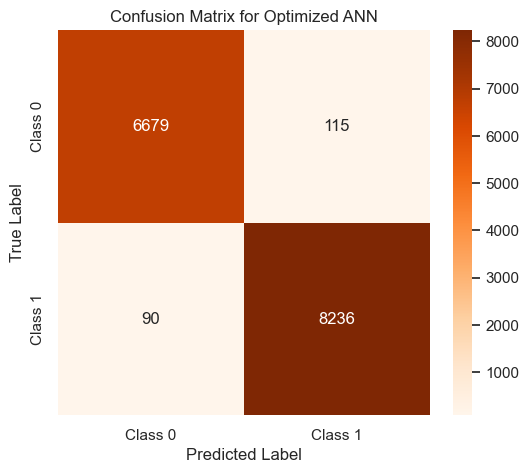

In [77]:
from keras.optimizers import Adam, RMSprop, SGD
from keras.layers import Dense, Dropout, BatchNormalization

# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    num_layers = trial.suggest_int("num_layers", 2, 5)
    num_neurons = trial.suggest_int("num_neurons", 32, 256)
    dropout_rate = trial.suggest_float("dropout_rate", 0.1, 0.5)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [32, 64, 128, 256])
    optimizer_name = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])

    # Select optimizer
    if optimizer_name == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = SGD(learning_rate=learning_rate, momentum=0.9)

    # Define ANN model
    model = Sequential()
    model.add(Dense(num_neurons, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Add hidden layers dynamically
    for _ in range(num_layers - 1):
        model.add(Dense(num_neurons, activation="relu"))
        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1, activation="sigmoid"))

    # Compile the model
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Train model with early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=50, batch_size=batch_size, validation_data=(X_test, y_test),
                        verbose=0, callbacks=[early_stopping])

    # Make predictions
    y_pred_prob = model.predict(X_test)
    y_pred_binary = (y_pred_prob > 0.5).astype(int)

    # Compute F1-score
    _, _, f1, _ = precision_recall_fscore_support(y_test, y_pred_binary, average="macro")

    return f1  # Optimize for macro F1-score

# Run Optuna study to find the best hyperparameters
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Retrieve the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

# Train final ANN model with the best parameters
model = Sequential()
model.add(Dense(best_params["num_neurons"], activation="relu", input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(best_params["dropout_rate"]))

for _ in range(best_params["num_layers"] - 1):
    model.add(Dense(best_params["num_neurons"], activation="relu"))
    model.add(BatchNormalization())
    model.add(Dropout(best_params["dropout_rate"]))

model.add(Dense(1, activation="sigmoid"))

# Select optimizer
if best_params["optimizer"] == "adam":
    optimizer = Adam(learning_rate=best_params["learning_rate"])
elif best_params["optimizer"] == "rmsprop":
    optimizer = RMSprop(learning_rate=best_params["learning_rate"])
else:
    optimizer = SGD(learning_rate=best_params["learning_rate"], momentum=0.9)

# Compile model
model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

# Train the final model
history = model.fit(X_train, y_train, epochs=100, batch_size=best_params["batch_size"], validation_data=(X_test, y_test),
                    verbose=1, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)])

# Make final predictions
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)

# Compute final performance metrics
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred_binary, labels=[0, 1], zero_division=0)
accuracy = accuracy_score(y_test, y_pred_binary)
cm = confusion_matrix(y_test, y_pred_binary)

# Print evaluation report
report = f"""
ANN - Optimized Model Evaluation

{'Class':<12}{'Precision':<12}{'Recall':<12}{'F1-Score':<12}{'Support':<12}
{'-'*55}
{0:<12}{precision[0]:<12.2f}{recall[0]:<12.2f}{f1[0]:<12.2f}{int(support[0]):<12}
{1:<12}{precision[1]:<12.2f}{recall[1]:<12.2f}{f1[1]:<12.2f}{int(support[1]):<12}

{'Accuracy':<12}{accuracy:<12.2f}
{'Macro Avg':<12}{np.mean(precision):<12.2f}{np.mean(recall):<12.2f}{np.mean(f1):<12.2f}{sum(support):<12}
"""

print(report)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Optimized ANN")
plt.show()

~##################################################################################################################


In [27]:

###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################
###################################################


In [ ]:
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
################################################################
# Choosing the best K for KNN using Cross-Validation
error_rate = []
k_values = range(1, 20)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=kf)
    error_rate.append(1 - scores.mean())  # Convert accuracy to error rate

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

# Final KNN Model with Best K
best_k = k_values[np.argmin(error_rate)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)

# Print KNN Evaluation Metrics
print(f'K-Nearest Neighbors with Best K ({best_k})')
print(confusion_matrix(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

# Confusion Matrix Display
cf = confusion_matrix(y_test, knn_preds, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=knn.classes_)
disp.plot()
plt.show()


Traditional Machine Learning Models:

1- Logistic Regression:

Let's determine the hyperparameters and fit models using L1 and L2 regularization.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

# Define a custom grid for Cs to ensure a wide range of values are tested
custom_cs = [0.001, 0.01, 0.1, 1, 10, 100]

# L1 regularized logistic regression with cross-validation
lr_l1 = LogisticRegressionCV(Cs=custom_cs, cv=kf, penalty='l1', solver='liblinear', verbose=0)
lr_l1.fit(X_train, y_train)

# Extract best C value and cross-validation scores
best_C = lr_l1.C_[0]
cv_scores = lr_l1.scores_[1]

print(f"Best C value (L1 regularized): {best_C}")
print(f"Cross-validated scores for each parameter: {cv_scores}")

best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for best C value: {best_score}")

In [ ]:
# L2 regularized logistic regression with cross-validation
lr_l2 = LogisticRegressionCV(Cs=custom_cs, cv=kf, penalty='l2', solver='liblinear')
lr_l2.fit(X_train, y_train)

# Extract best C value and cross-validation scores
best_C = lr_l2.C_[0]
cv_scores = lr_l2.scores_[1]

print(f"Best C value (L2 regularized): {best_C}")
print(f"Cross-validated scores for each parameter: {cv_scores}")

best_score = cv_scores.mean(axis=0)[custom_cs.index(best_C)]
print(f"Mean cross-validated score for best C value: {best_score}")



The scores are quite low and very similar. Let's proceed with the L2 regularized model. 
Now, we will predict the class for L2 regularized model.


In [36]:
# Final Logistic Regression Predictions
l2_preds = lr_l2.predict(X_test)

Evaluation:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print("Logistic Regression (L2) - Final Evaluation")
print(classification_report(y_test, l2_preds))

Confusion Matrix:

In [ ]:
# Confusion Matrix for Logistic Regression
cf = confusion_matrix(y_test, l2_preds, normalize='true')

sns.set_theme(style="white", context="talk")
disp = ConfusionMatrixDisplay(confusion_matrix=cf)
disp.plot()
plt.show()

As we can see, 73% of poisonous mushrooms are labeled correctly. But we have a big confusion in edible mushrooms, almost half of them (45%) are labeled as poisonous. We will need different model. Let's try another simple model KNN.

2- K-Nearest Neighbors:

We will start with k=1, and later will choose better K value.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

In [44]:
knn_preds = knn.predict(X_test)


Evaluation:

In [ ]:
print(classification_report(y_test, knn_preds))


In [ ]:
print(confusion_matrix(y_test,knn_preds))


Choosing a K Value

In [47]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
        markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');


Here we can see that at K=3 the error rate is the lowest and it's around 0.013. Let's retrain the KNN model with K=3.

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train,y_train)
knn_preds = knn.predict(X_test)

print('K Nearest Neighbors')
print('\n')
print(confusion_matrix(y_test,knn_preds))
print('\n')
print(classification_report(y_test,knn_preds))

In [ ]:
cf = confusion_matrix(y_test, knn_preds, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=knn.classes_)
disp.plot()
plt.show()